In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
path_to_file = 'soil.csv'
soil_data = pd.read_csv(path_to_file)

In [ ]:
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [ ]:
soil_data=soil_data.dropna()#removing rows with missing data
soil_data=soil_data.sample(n=155)#randomly selecting 155 data points
soil_data_oh = pd.get_dummies(soil_data)
soil_data_oh

,Zn %,Fe%,Cu %,Mn %,B %,S %,District _24 Paraganas North,District _Agar Malwa,District _Almora,District _Amethi,...,District _Tumkur,District _Ujjain,District _Umaria,District _Unakoti,District _VIKARABAD,District _Valsad,District _Varanasi,District _Yadgir,District _Yavatmal,District _Zunheboto
286,76.29,76.66,94.18,66.97,36.84,19.14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,46.20,49.77,92.60,67.69,5.70,55.22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,94.98,84.98,99.16,98.05,0.29,100.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,17.52,23.06,31.45,18.84,6.11,24.58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,21.67,64.70,93.30,89.52,78.24,23.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,57.58,97.85,92.41,99.13,73.10,87.79,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
346,27.24,28.10,96.28,92.24,80.66,28.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,38.44,46.54,99.07,94.60,56.17,53.81,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
354,41.42,32.68,99.80,98.37,35.87,9.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


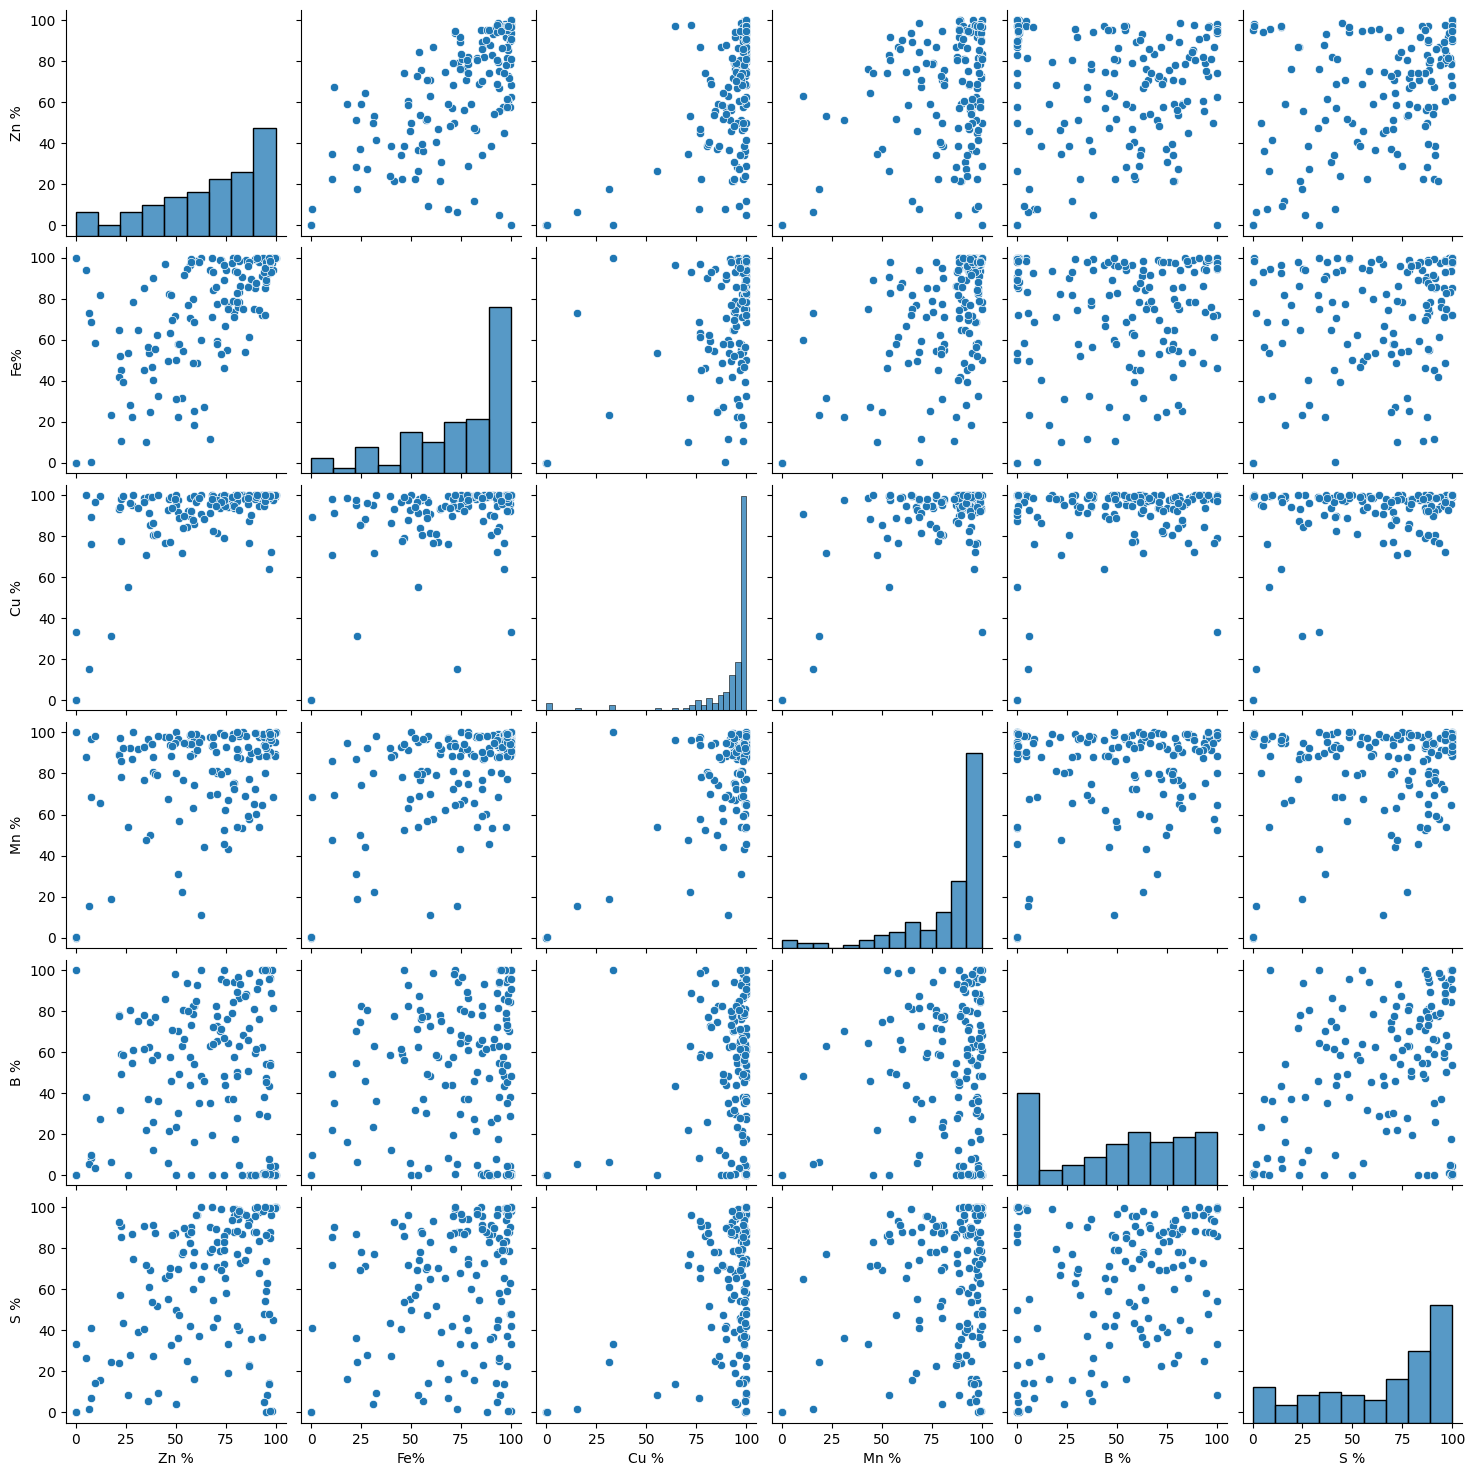

In [ ]:
sns.pairplot(soil_data)

<AxesSubplot:xlabel='Fe%', ylabel='S %'>

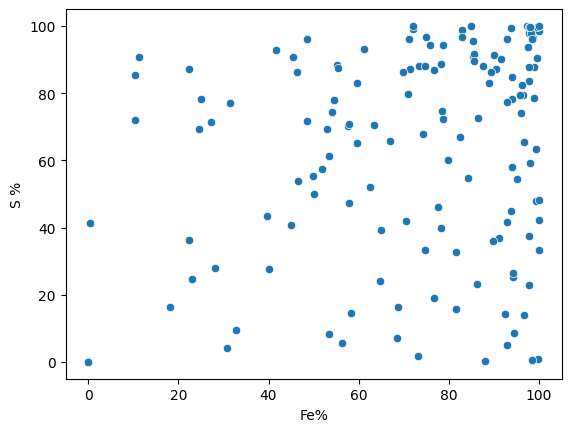

In [ ]:
sns.scatterplot(x=soil_data['Fe%'],y=soil_data['S %'])

# COMPLETE LINKAGE

## DENDOGRAM

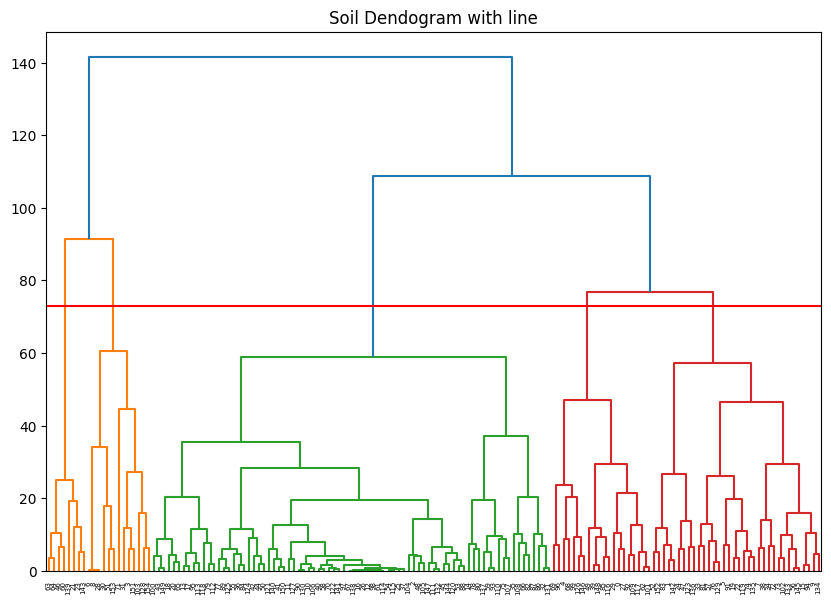

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendrogram")
selected_data = soil_data_oh.iloc[:, [1,5]]
plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, method='complete', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

## AGGLOMERATIVE CLUSTERING

Text(0.5, 1.0, 'Soil Data')

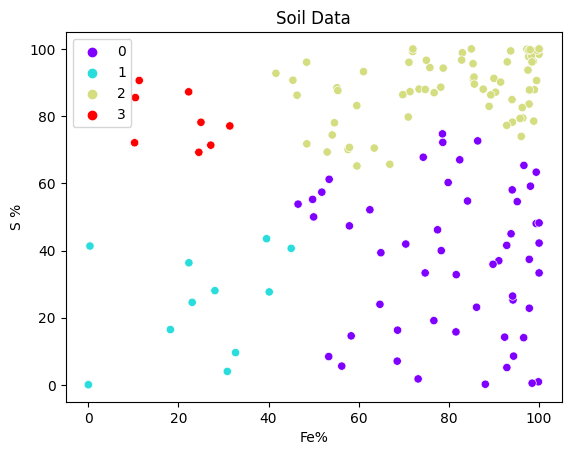

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x='Fe%',
                y='S %',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Soil Data')

# SINGLE LINKAGE

## DENDOGRAM

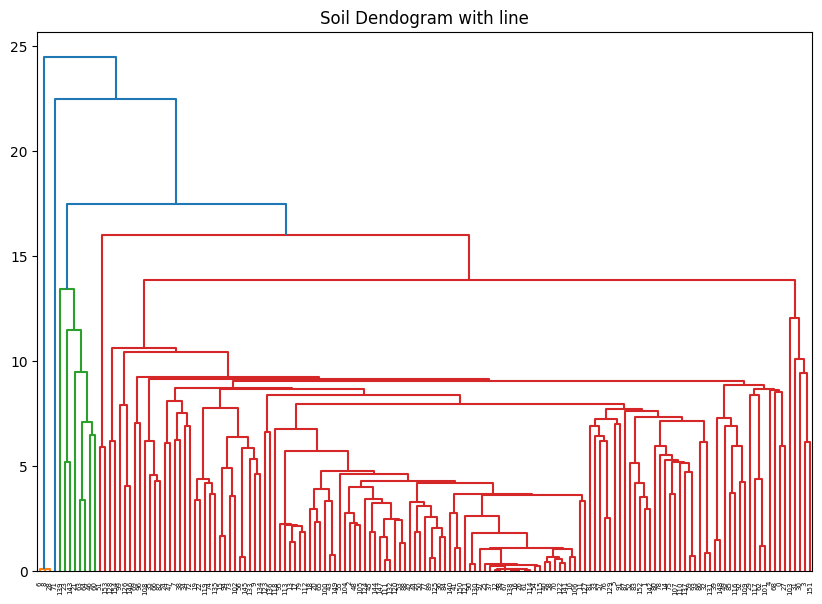

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendrogram")
selected_data = soil_data_oh.iloc[:, [1,5]]
plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, method='single', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

## AGGLOMERATIVE CLUSTERING

Text(0.5, 1.0, 'Soil Data')

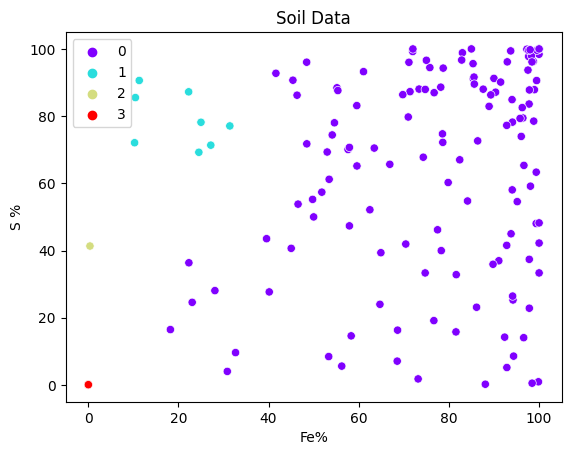

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x='Fe%',
                y='S %',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Soil Data')

# AVERAGE LINKAGE

## DENDOGRAM

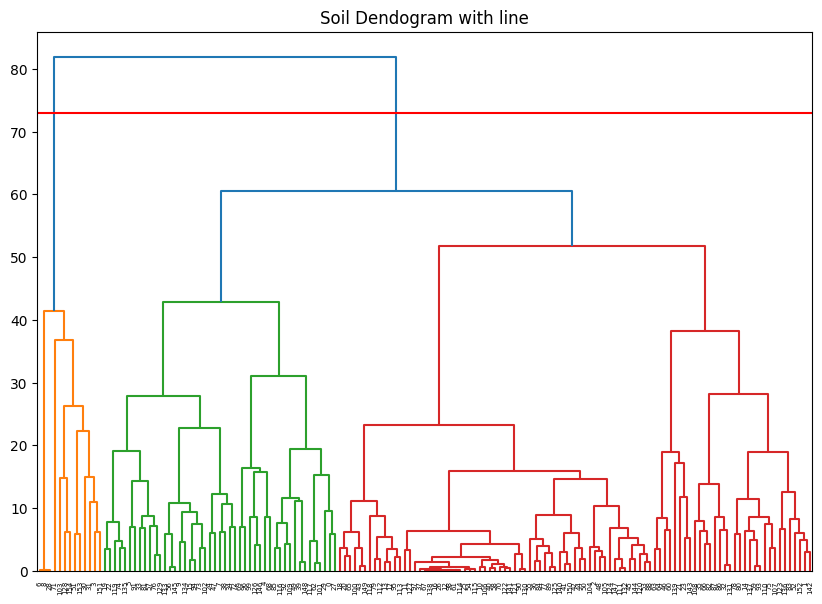

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendrogram")
selected_data = soil_data_oh.iloc[:, [1,5]]
plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, method='average', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

## AGGLOMERATIVE CLUSTERING

Text(0.5, 1.0, 'Soil Data')

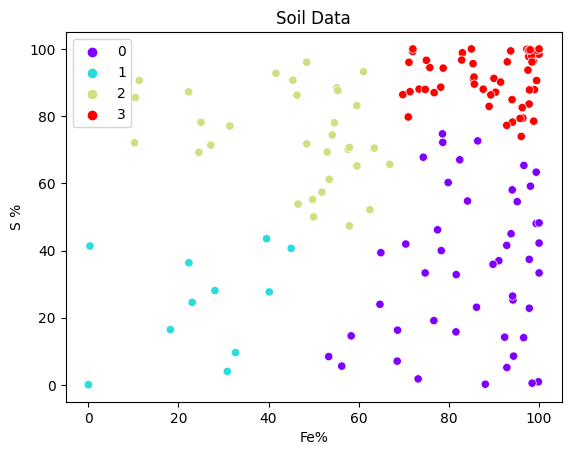

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x='Fe%',
                y='S %',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Soil Data')

# WARD LINKAGE

## DENDOGRAM

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendrogram")
selected_data = soil_data_oh.iloc[:, [1,5]]
plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, method='ward', metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

NameError: ignored

## AGGLOMERATIVE CLUSTERING

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x='Fe%',
                y='S %',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Soil Data')